In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
from folium.plugins import HeatMap
import folium
from folium.plugins import HeatMap, MarkerCluster
import plotly.express as px
import plotly.io as pio


### Carrega dados

In [257]:
# dados23 = pd.read_excel('../data/CelularesSubtraidos_2023.xlsx')
# dados23 = dados23[dados23['NOME_MUNICIPIO']=='RIBEIRAO PRETO']
# dados24 = pd.read_excel('../data/CelularesSubtraidos_2024.xlsx')
# dados24 = dados24[dados24['NOME_MUNICIPIO']=='RIBEIRAO PRETO']

In [259]:
# dados = pd.concat([dados23, dados24], ignore_index=True)
# dados.to_csv("../data/CelularesSubtraidos_2023_2024_sp.csv")
# len(dados)

5882

In [4]:
dados = pd.read_csv("../data/CelularesSubtraidos_2023_2024_rp.csv")
print(len(dados))
dados.head(3)

5882


,Unnamed: 0.1,Unnamed: 0,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,NOME_DELEGACIA,NOME_MUNICIPIO,ANO_BO,NUM_BO,VERSAO,...,DESCR_TIPO_OBJETO,DESCR_SUBTIPO_OBJETO,DESCR_UNIDADE,QUANTIDADE_OBJETO,MARCA_OBJETO,FLAG_BLOQUEIO,FLAG_DESBLOQUEIO,MES,ANO,PERIODO_DO_DIA
0,0,0,900023,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA 3,RIBEIRAO PRETO,2023,AI6605,1,...,Telecomunicação,Telefone Celular,NaN,1,Motorola,N,N,1,2023,Tarde
1,1,1,100919,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.RIBEIRAO PRETO,CPJ RIBEIRAO PRETO,RIBEIRAO PRETO,2023,AL6985,1,...,Telecomunicação,Telefone Celular,Unidade,1,Motorola,NaN,NaN,1,2023,NaN
2,2,2,100919,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.RIBEIRAO PRETO,CPJ RIBEIRAO PRETO,RIBEIRAO PRETO,2023,AL8902,1,...,Telecomunicação,Telefone Celular,Unidade,1,Samsung,S,N,1,2023,Manhã


### Entendimento dos Dados

In [5]:
print("Variáveis:")
print(dados.columns)

Variáveis:
Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID_DELEGACIA', 'NOME_DEPARTAMENTO',
       'NOME_SECCIONAL', 'NOME_DELEGACIA', 'NOME_MUNICIPIO', 'ANO_BO',
       'NUM_BO', 'VERSAO', 'NOME_DEPARTAMENTO_CIRC', 'NOME_SECCIONAL_CIRC',
       'NOME_DELEGACIA_CIRC', 'NOME_MUNICIPIO_CIRC', 'DATA_OCORRENCIA_BO',
       'HORA_OCORRENCIA', 'DESCRICAO_APRESENTACAO', 'DATAHORA_REGISTRO_BO',
       'DATA_COMUNICACAO_BO', 'DATAHORA_IMPRESSAO_BO', 'DESCR_PERIODO',
       'AUTORIA_BO', 'FLAG_INTOLERANCIA', 'TIPO_INTOLERANCIA',
       'FLAG_FLAGRANTE', 'FLAG_STATUS', 'DESC_LEI', 'FLAG_ATO_INFRACIONAL',
       'RUBRICA', 'DESCR_CONDUTA', 'DESDOBRAMENTO', 'CIRCUNSTANCIA',
       'DESCR_TIPOLOCAL', 'DESCR_SUBTIPOLOCAL', 'CIDADE', 'BAIRRO', 'CEP',
       'LOGRADOURO_VERSAO', 'LOGRADOURO', 'NUMERO_LOGRADOURO', 'LATITUDE',
       'LONGITUDE', 'CONT_OBJETO', 'DESCR_MODO_OBJETO', 'DESCR_TIPO_OBJETO',
       'DESCR_SUBTIPO_OBJETO', 'DESCR_UNIDADE', 'QUANTIDADE_OBJETO',
       'MARCA_OBJETO', 'FLAG_BLOQUEIO', '

Valores ausentes

In [261]:
# Valores Ausentes
print("\nValores Ausentes por Coluna:")
# print(dados.isnull().sum())

# Distribuição de Valores Ausentes
print("\nDistribuição de Valores Ausentes (Percentual):")
missing_percentage = (dados.isnull().sum() / len(dados)) * 100
print(missing_percentage.sort_values(ascending=False))

rocket_palette = sns.color_palette("rocket", 10)
purple_color = rocket_palette[2]  

# Visualização da Distribuição de Valores Ausentes
# plt.figure(figsize=(10, 6))
# sns.barplot(x=missing_percentage.index, y=missing_percentage.values, color=purple_color)
# plt.xticks(rotation=90)
# plt.title('Percentual de Valores Ausentes por Coluna')
# plt.ylabel('Percentual')
# plt.xlabel('Colunas')
# plt.show()

# Criando o gráfico com Plotly
fig = px.bar(
    x=missing_percentage.index,
    y=missing_percentage.values,
    labels={'x': 'Colunas', 'y': 'Percentual'},
    color_discrete_sequence=['#6a0dad']  # Cor roxa
)

# Atualizando o layout para ajustar o eixo x
fig.update_layout(
    template='plotly_dark',
    plot_bgcolor='#1e1e1e',
    paper_bgcolor='#1e1e1e',
    font=dict(color='white'),
    title=dict(font=dict(color='white')),
    xaxis=dict(
        tickangle=45,  # Rotaciona os rótulos do eixo x para -45 graus
        tickfont=dict(size=7) 
        
    ),
    margin=dict(l=50, r=50, t=50, b=150)
)

# Salvando o gráfico como arquivo HTML
pio.write_html(fig, file='../results/percentual_valores_ausentes.html', auto_open=False)


Valores Ausentes por Coluna:

Distribuição de Valores Ausentes (Percentual):
TIPO_INTOLERANCIA         100.000000
DESDOBRAMENTO              98.384903
CIRCUNSTANCIA              88.677321
DESCR_UNIDADE              70.469228
HORA_OCORRENCIA            52.567154
DESCR_PERIODO              47.432846
DESCR_CONDUTA              22.934376
DESCR_TIPOLOCAL            18.735124
DESCR_SUBTIPOLOCAL         17.630058
LONGITUDE                  12.189731
LATITUDE                   12.189731
CEP                        10.404624
FLAG_BLOQUEIO               6.919415
FLAG_DESBLOQUEIO            6.919415
NUMERO_LOGRADOURO           5.661340
BAIRRO                      0.561034
CONT_OBJETO                 0.000000
DESCR_MODO_OBJETO           0.000000
DESCR_TIPO_OBJETO           0.000000
DESCR_SUBTIPO_OBJETO        0.000000
LOGRADOURO                  0.000000
LOGRADOURO_VERSAO           0.000000
QUANTIDADE_OBJETO           0.000000
CIDADE                      0.000000
MARCA_OBJETO                0.0000

## Pre processamento

In [10]:
# Madrugada: 0h - 5h
# Manhã: 6h - 11h
# Tarde: 12h - 17h
# Noite: 18h - 23h

dados_filter = dados.dropna(subset=['HORA_OCORRENCIA'])

dados_filter['HORA_OCORRENCIA'] = pd.to_datetime(dados_filter['HORA_OCORRENCIA'], format='%H:%M:%S').dt.hour

def categorizar_periodo(hora):
    if 0 <= hora < 6:
        return 'Madrugada'
    elif 6 <= hora < 12:
        return 'Manhã'
    elif 12 <= hora < 18:
        return 'Tarde'
    elif 18 <= hora < 24:
        return 'Noite'

# Aplicar a função de categorização
dados_filter['PERIODO_DO_DIA'] = dados_filter['HORA_OCORRENCIA'].apply(categorizar_periodo)

# Contar o número de ocorrências em cada período do dia
periodo_counts = dados_filter['PERIODO_DO_DIA'].value_counts().sort_index()

dados['PERIODO_DO_DIA'] = dados_filter['PERIODO_DO_DIA']
print(periodo_counts)

PERIODO_DO_DIA
Madrugada     520
Manhã         659
Noite        1012
Tarde         599
Name: count, dtype: int64


/tmp/ipykernel_501850/1698926936.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_filter['HORA_OCORRENCIA'] = pd.to_datetime(dados_filter['HORA_OCORRENCIA'], format='%H:%M:%S').dt.hour
/tmp/ipykernel_501850/1698926936.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_filter['PERIODO_DO_DIA'] = dados_filter['HORA_OCORRENCIA'].apply(categorizar_periodo)


Corrige bairro com nome errado

In [11]:
import unicodedata

def normalize_string(s):
    if isinstance(s, str):
        s = unicodedata.normalize('NFKD', s).encode('ASCII', 'ignore').decode('utf-8')
        return s.upper()
    return s

# Aplicar a normalização à coluna 'BAIRRO'
dados['BAIRRO'] = dados['BAIRRO'].apply(normalize_string)

mapping = {
    'CAMPOS ELISIOS': 'CAMPOS ELISEOS',
    'JARDIM JOQUEI CLUBE': 'JD JOQUEI CLUBE',
    # Adicione outras correções específicas aqui, se necessário
}

# Função para aplicar o mapeamento
def correct_bairro(bairro):
    return mapping.get(bairro, bairro)

# Aplicar a correção à coluna 'BAIRRO'
dados['BAIRRO'] = dados['BAIRRO'].apply(correct_bairro)

# Agrupar pelos bairros corrigidos e somar as ocorrências
# dados = dados.groupby('BAIRRO')['COUNT'].sum().reset_index()
dados['BAIRRO'].value_counts()

BAIRRO
CENTRO                     607
JD JOQUEI CLUBE            558
CAMPOS ELISEOS             478
RIBEIRANIA                 154
VILA TIBERIO               147
                          ... 
JARDIM JAVARI                1
JARDIM PLANALTO              1
PARQUE DOS BANDEIRANTES      1
CJ HAB JD PALMEIRAS          1
JARDIM GENESIO MASSARO       1
Name: count, Length: 282, dtype: int64

In [13]:
dados23 = dados[dados['ANO']==2023]

dados23['BAIRRO'].value_counts()

BAIRRO
JD JOQUEI CLUBE                  522
CENTRO                           446
CAMPOS ELISEOS                   341
RIBEIRANIA                       124
PQ RIBEIRAO PRETO                115
                                ... 
CONDOMINIO VILLA BUENOS AIRES      1
REPUBLICA                          1
JARDIM PATRIARCA                   1
JARDIM JAMIL SEME CURY             1
RES E COM PALMARES                 1
Name: count, Length: 262, dtype: int64

In [313]:
# dados = pd.concat([dados23, dados24], ignore_index=True)
dados.to_csv("../data/CelularesSubtraidos_2023_2024_rp.csv")
len(dados)

5882

## Analises iniciais


### Mapa de calor com crimes

In [14]:
map_center = [-21.1775, -47.8103]

from folium.plugins import HeatMap, MarkerCluster, Fullscreen

def gera_heatmap(data, path_to_save):
    # Criar um mapa base
    data_cp = data.copy()
    data_cp = data_cp[
        (data_cp['LATITUDE'] <= 5.27) & (data_cp['LATITUDE'] >= -33.75) & 
        (data_cp['LONGITUDE'] >= -73.99) & (data_cp['LONGITUDE'] <= -34.79)
    ]
    mapa = folium.Map(location=map_center, zoom_start=14)
    Fullscreen().add_to(mapa)
    # Adicionar os pontos de crimes como um mapa de calor
    heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in data_cp.iterrows() if not pd.isnull(row['LATITUDE']) and not pd.isnull(row['LONGITUDE'])]
    HeatMap(heat_data).add_to(mapa)

    # Adicionar os pontos de crimes usando clusters
    marker_cluster = MarkerCluster().add_to(mapa)
    for index, row in data_cp.iterrows():
        if not pd.isnull(row['LATITUDE']) and not pd.isnull(row['LONGITUDE']):
            folium.Marker(
                location=[row['LATITUDE'], row['LONGITUDE']],
                popup = (
                    f"Tipo de Local: {row['DESCR_TIPOLOCAL']}<br>"
                    f"Data: {row['DATA_OCORRENCIA_BO']}<br>"
                    f"Lat: {row['LATITUDE']}<br>"
                    f"Lng: {row['LONGITUDE']}"
                ),
                icon=folium.Icon(color='blue', icon='info-sign')
            ).add_to(marker_cluster)

    # Salvar o mapa em um arquivo HTML
    mapa.save(path_to_save)
    
path='../results/heatmap_rp_celular_2023.html'
gera_heatmap(dados23, path)

In [314]:
# dados24 = dados[dados['ANO']==2024]
path='../results/heatmap_rp_celular_2023_e_2024.html'
gera_heatmap(dados, path)
# dados_filtered = dados[dados['PERIODO_DO_DIA']=='Madrugada']
# path='../results/heatmap_rp_celular_madrugada.html'
# gera_heatmap(dados_filtered, path)

# dados_filtered = dados[dados['PERIODO_DO_DIA']=='Noite']
# path='../results/heatmap_rp_celular_noite.html'
# gera_heatmap(dados_filtered, path)

# dados_filtered = dados[dados['PERIODO_DO_DIA']=='Manhã']
# path='../results/heatmap_rp_celular_manha.html'
# gera_heatmap(dados_filtered, path)

# dados_filtered = dados[dados['PERIODO_DO_DIA']=='Tarde']
# path='../results/heatmap_rp_celular_tarde.html'
# gera_heatmap(dados_filtered, path)


### Local com maior ocorrencia

In [274]:
dados['DESCR_TIPOLOCAL'].value_counts()

DESCR_TIPOLOCAL
Via Pública                     4014
Residência                       196
Lazer e Recreação                 96
Comércio e Serviços               87
Terminal/Estação                  67
Rodovia/Estrada                   49
Restaurante e Afins               42
Condomínio Residencial            33
Estacionamento/Garagem            32
Condomínio Comercial              31
Area não Ocupada                  24
Centro Comercial/Empresarial      16
Shopping Center                   13
Unidade Rural                     12
Saúde                             11
Hospedagem                         9
Escritório                         9
Estabelecimento Industrial         8
Repartição Pública                 8
Estabelecimento de Ensino          7
Entidade Assistencial              4
Favela                             4
Local Clandestino/Ilegal           3
Templo e Afins                     2
Estabelecimento Bancário           2
Internet                           1
Name: count, dtype: in

/tmp/ipykernel_29538/3476887718.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




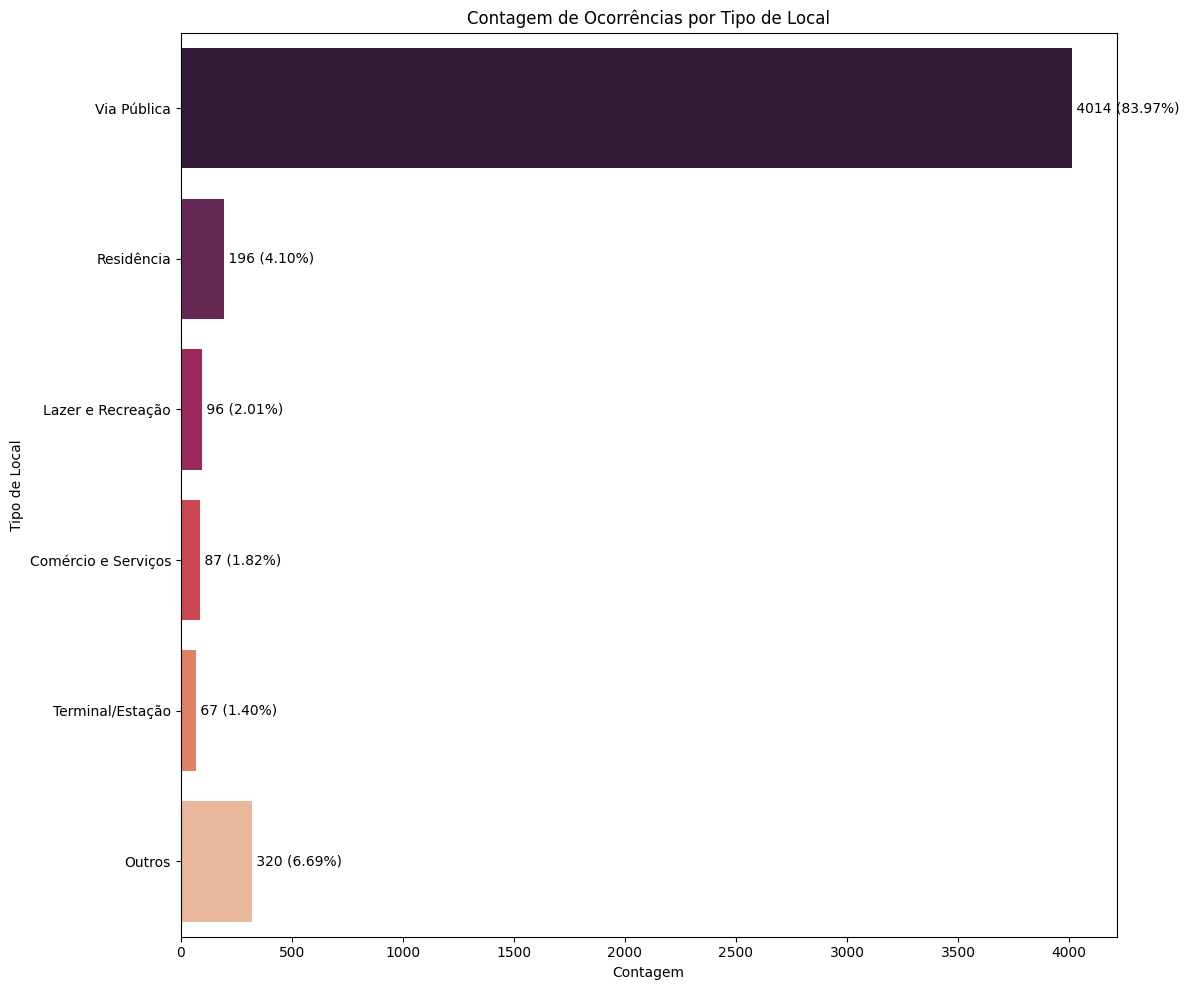

In [276]:

tipo_local_counts = dados.dropna(subset=['DESCR_TIPOLOCAL'])
tipo_local_counts = dados['DESCR_TIPOLOCAL'].value_counts()

top_5_locais = tipo_local_counts.head(5)
resto = tipo_local_counts[5:].sum()
top_5_locais['Outros'] = resto

# Reformatar os dados para um DataFrame
top_5_locais_df = top_5_locais.reset_index()
top_5_locais_df.columns = ['DESCR_TIPOLOCAL', 'Contagem']
total_count_adjusted = top_5_locais.sum()

# Plotando o gráfico
plt.figure(figsize=(12, 10))

# Barplot principal
sns.barplot(x='Contagem', y='DESCR_TIPOLOCAL', data=top_5_locais_df, palette='rocket')

# Adicionando informações de proporção dentro das barras
for index, value in enumerate(top_5_locais):
    plt.text(value, index, f' {value} ({value / total_count_adjusted * 100:.2f}%)', ha='left', va='center', color='black')

# Configurações do gráfico
plt.title('Contagem de Ocorrências por Tipo de Local')
plt.xlabel('Contagem')
plt.ylabel('Tipo de Local')

# Ajustando o layout
plt.tight_layout()
plt.show()

In [277]:
# Contagem dos tipos de local
tipo_local_counts = dados.dropna(subset=['DESCR_TIPOLOCAL'])
tipo_local_counts = dados['DESCR_TIPOLOCAL'].value_counts()

top_5_locais = tipo_local_counts.head(5)
resto = tipo_local_counts[5:].sum()
top_5_locais['Outros'] = resto


# Reformatar os dados para um DataFrame
top_5_locais_df = top_5_locais.reset_index()
top_5_locais_df.columns = ['DESCR_TIPOLOCAL', 'Contagem']

total_count_adjusted = top_5_locais.sum()

# Ordenar por quantidade
top_5_locais_df = top_5_locais_df.sort_values(by='Contagem', ascending=False)

# Converter a paleta de cores 'rocket' do Seaborn para uma lista de cores para Plotly
palette = [f'rgb{tuple(int(c*255) for c in color)}' for color in sns.color_palette("rocket", len(top_5_locais_df))]

fig = px.bar(
    top_5_locais_df,
    x='Contagem',
    y='DESCR_TIPOLOCAL',
    orientation='h',
    labels={'DESCR_TIPOLOCAL': 'Tipo de Local', 'Contagem': 'Contagem'},
    text=top_5_locais_df['Contagem'].apply(lambda x: f'{x} ({x / total_count_adjusted * 100:.2f}%)')
)


# Aplicar a paleta de cores 'rocket'
fig.update_traces(marker=dict(color=top_5_locais_df['DESCR_TIPOLOCAL'].apply(lambda x: palette[top_5_locais_df['DESCR_TIPOLOCAL'].tolist().index(x)])))

# Configurações de layout para dark mode
fig.update_layout(
    title_font=dict(size=24, color='white'),
    xaxis_title='Contagem',
    yaxis_title='Tipo de Local',
    font=dict(color='white'),
    paper_bgcolor='#0E1117',
    plot_bgcolor='#0E1117',
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)


# Save plot to HTML
fig.write_html("../results/tipo_local.html")


In [113]:
tipo_counts = dados['RUBRICA'].value_counts()
print(tipo_counts)
tipo_counts['Outros'] = tipo_counts[~tipo_counts.index.isin(['Furto (art. 155)', 'Roubo (art. 157)', 'Perda/Extravio'])].sum()
tipo_counts = tipo_counts[['Furto (art. 155)', 'Roubo (art. 157)', 'Perda/Extravio', 'Outros' ]]

RUBRICA
Furto (art. 155)                                                                    2570
Roubo (art. 157)                                                                    1951
Perda/Extravio                                                                       992
Outros não criminal                                                                   97
Localização/Apreensão e Entrega de veículo                                            90
Estelionato (art. 171)                                                                23
Ameaça (art. 147)                                                                     21
Lesão corporal (art. 129)                                                             16
Localização/Apreensão e Entrega de objeto                                             16
Localização/Apreensão de veículo                                                      12
Caput Corromper ou facilitar a corrupção de menor de 18 anos (244B)                    9
Receptação (a

/tmp/ipykernel_29538/2676147973.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




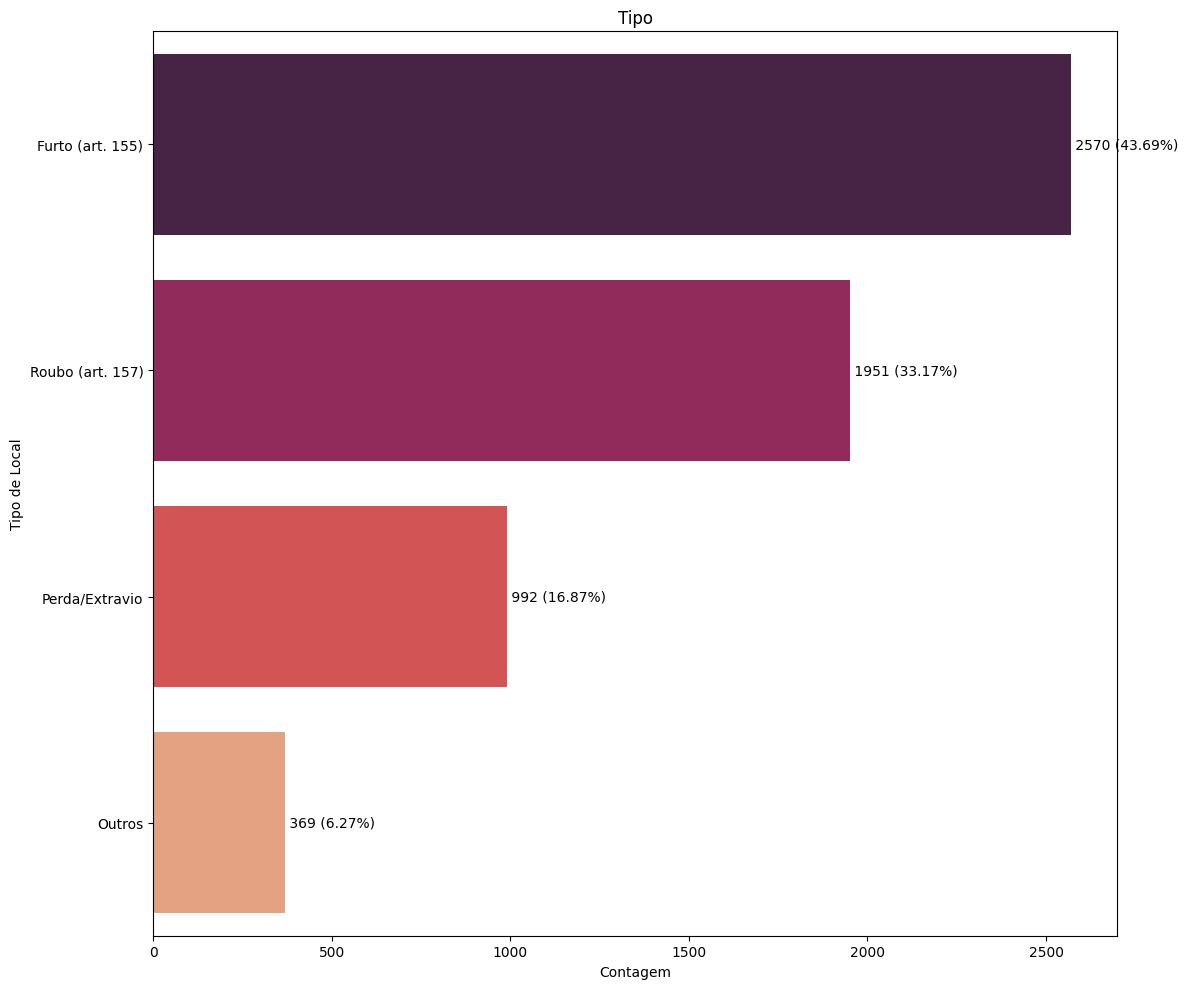

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
top_20_locais = tipo_counts.head(5)

# Reformatar os dados para um DataFrame
top_20_locais_df = top_20_locais.reset_index()
top_20_locais_df.columns = ['RUBRICA', 'Contagem']

# Plotando o gráfico
plt.figure(figsize=(12, 10))

# Barplot principal
sns.barplot(x='Contagem', y='RUBRICA', data=top_20_locais_df, palette='rocket')

# Adicionando informações de proporção dentro das barras
for index, value in enumerate(top_20_locais):
    plt.text(value, index, f' {value} ({value / len(dados) * 100:.2f}%)', ha='left', va='center', color='black')

# Configurações do gráfico
plt.title('Tipo')
plt.xlabel('Contagem')
plt.ylabel('Tipo de Local')

# Ajustando o layout
plt.tight_layout()

plt.show()


In [118]:
palette = sns.color_palette("rocket", as_cmap=False).as_hex()

# Plotando o gráfico usando Plotly
fig = px.bar(top_20_locais_df, x='Contagem', y='RUBRICA', orientation='h', 
              labels={'RUBRICA': 'Tipo de Ocorrência', 'Contagem': 'Contagem'},
             text=top_20_locais_df['Contagem'].apply(lambda x: f'{x} ({x / len(dados) * 100:.2f}%)'))

# Aplicar a paleta de cores convertida ao gráfico
fig.update_traces(marker=dict(color=top_20_locais_df['Contagem'], colorscale=palette))

# Configurações de layout para dark mode
fig.update_layout(
    title_font=dict(size=24, color='white'),
    xaxis_title='Contagem',
    yaxis_title='Tipo de Ocorrência',
    font=dict(color='white'),
    paper_bgcolor='#0E1117',
    plot_bgcolor='#0E1117',
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)

# Save plot to HTML
fig.write_html("../results/tipo.html")

### Coordenadas paralelas

In [288]:
dados23_cp = dados23.copy()
dados23_cp['Indice Ocorrencia'] = range(len(dados23_cp))
dados23_cp

# dados_filter_rp = dados.dropna(subset=['BAIRRO', 'PERIODO_DO_DIA'])

# Identificar os bairros com mais ocorrências
bairros_mais_ocorrencias = dados23_cp['BAIRRO'].value_counts().nlargest(4).index
bairros_mais_ocorrencias
dados_filter_rp = dados23_cp[dados23_cp['BAIRRO'].isin(bairros_mais_ocorrencias)].copy()
dados_filter_rp['BAIRRO'].value_counts()

BAIRRO
JD JOQUEI CLUBE    522
CENTRO             446
CAMPOS ELISEOS     341
RIBEIRANIA         124
Name: count, dtype: int64

In [289]:
dados_filter_rp['DATA_OCORRENCIA_BO'] = pd.to_datetime(dados_filter_rp['DATA_OCORRENCIA_BO'])

dados_filter_rp['mes_ocorrencia'] = dados_filter_rp['DATA_OCORRENCIA_BO'].dt.month

dados_filter_rp['bimestre_ocorrencia'] = (dados_filter_rp['mes_ocorrencia'] - 1) // 2 + 1


In [290]:
tipo_counts = dados_filter_rp['RUBRICA'].value_counts()
tipos_in=['Furto (art. 155)', 'Roubo (art. 157)', 'Perda/Extravio']
tipo_counts['Outros'] = tipo_counts[~tipo_counts.index.isin(tipos_in)].sum()
tipo_counts = tipo_counts[['Furto (art. 155)', 'Roubo (art. 157)', 'Perda/Extravio', 'Outros']]
tipo_counts

RUBRICA
Furto (art. 155)    939
Roubo (art. 157)    262
Perda/Extravio      187
Outros               45
Name: count, dtype: int64

In [291]:
dados_filter_rp.loc[~dados_filter_rp['RUBRICA'].isin(tipos_in), 'RUBRICA'] = 'Outros'

dados_filter_rp['RUBRICA'].value_counts()

RUBRICA
Furto (art. 155)    939
Roubo (art. 157)    262
Perda/Extravio      187
Outros               45
Name: count, dtype: int64

In [292]:
dados_filter_rp[['BAIRRO', 'RUBRICA', 'bimestre_ocorrencia']].head(5)

,BAIRRO,RUBRICA,bimestre_ocorrencia
0,CENTRO,Furto (art. 155),1
1,CENTRO,Roubo (art. 157),1
3,CENTRO,Roubo (art. 157),1
4,CENTRO,Roubo (art. 157),1
5,CENTRO,Roubo (art. 157),1


In [297]:
dados_filter_rp = dados_filter_rp.sort_values(by='bimestre_ocorrencia')

# Mapear categorias para cores utilizando a paleta de cores do Seaborn
palette = sns.color_palette("tab10", len(dados_filter_rp['bimestre_ocorrencia'].unique()))
cor_por_categoria = dict(zip(dados_filter_rp['bimestre_ocorrencia'].unique(), palette))
cor_por_categoria_rgb = {cat: f'rgb({int(cor[0]*255)},{int(cor[1]*255)},{int(cor[2]*255)})' for cat, cor in cor_por_categoria.items()}

# Adicionar uma coluna de cores ao DataFrame com base na categoria
dados_filter_rp['COR'] = dados_filter_rp['bimestre_ocorrencia'].map(cor_por_categoria_rgb)

# Criar o gráfico de coordenadas paralelas
fig = px.parallel_categories(dados_filter_rp, dimensions=['BAIRRO', 'RUBRICA', 'bimestre_ocorrencia'],
                             color='COR', labels={'BAIRRO': 'Bairro', 'RUBRICA': 'Tipo', 'bimestre_ocorrencia': 'Bimestre'})

# Adicionar título
# fig.update_layout(title='Distribuição de Crimes por Categoria e Período do Dia nos Bairros com mais Ocorrências')

# Mostrar o gráfico
fig.write_html("../results/parallel_categories_rp_celular_2023.html")

In [307]:
dados_filter_rp = dados_filter_rp.sort_values(by='bimestre_ocorrencia')

# Mapear categorias para cores utilizando a paleta de cores do Seaborn
palette = sns.color_palette("tab10", len(dados_filter_rp['bimestre_ocorrencia'].unique()))
cor_por_categoria = dict(zip(dados_filter_rp['bimestre_ocorrencia'].unique(), palette))
cor_por_categoria_rgb = {cat: f'rgb({int(cor[0]*255)},{int(cor[1]*255)},{int(cor[2]*255)})' for cat, cor in cor_por_categoria.items()}

# Adicionar uma coluna de cores ao DataFrame com base na categoria
dados_filter_rp['COR'] = dados_filter_rp['bimestre_ocorrencia'].map(cor_por_categoria_rgb)

# Criar o gráfico de coordenadas paralelas
fig = px.parallel_categories(dados_filter_rp, dimensions=['BAIRRO', 'RUBRICA', 'bimestre_ocorrencia'],
                             color=dados_filter_rp['bimestre_ocorrencia'].map(cor_por_categoria_rgb),
                             labels={'BAIRRO': 'Bairro', 'RUBRICA': 'Tipo', 'bimestre_ocorrencia': 'Bimestre'},
                             color_continuous_scale=None)

# Configurações de layout para dark mode e aumento do tamanho do gráfico
fig.update_layout(
    # title='Distribuição de Crimes por Categoria e Período do Dia nos Bairros com mais Ocorrências',
    title_font=dict(size=24, color='white'),
    font=dict(color='white'),
    paper_bgcolor='#0E1117',
    plot_bgcolor='#0E1117',
    width=800,
    height=600
)

fig.write_html("../results/parallel_categories_rp_celular_2023.html")



### Analise tempo

In [229]:

dados['DATA_OCORRENCIA_BO'] = pd.to_datetime(dados23['DATA_OCORRENCIA_BO'])

dados23['mes_ocorrencia'] = dados23['DATA_OCORRENCIA_BO'].dt.month

dados23['bimestre_ocorrencia'] = (dados23['mes_ocorrencia'] - 1) // 2 + 1

dados23[['BAIRRO', 'RUBRICA', 'bimestre_ocorrencia', 'mes_ocorrencia']]

# Agrupar por mês e contar as ocorrências
mensal_counts = dados23.groupby('mes_ocorrencia').size().reset_index(name='Contagem')

# Agrupar por bimestre e contar as ocorrências
bimestral_counts = dados23.groupby('bimestre_ocorrencia').size().reset_index(name='Contagem')

# # Plotando o gráfico mensal
# plt.figure(figsize=(14, 6))
# sns.lineplot(x='mes_ocorrencia', y='Contagem', data=mensal_counts, marker='o')
# plt.title('Contagem de Ocorrências por Mês')
# plt.xlabel('Mês')
# plt.ylabel('Contagem de Ocorrências')
# plt.xticks(range(1, 13))
# plt.grid(True)
# plt.show()


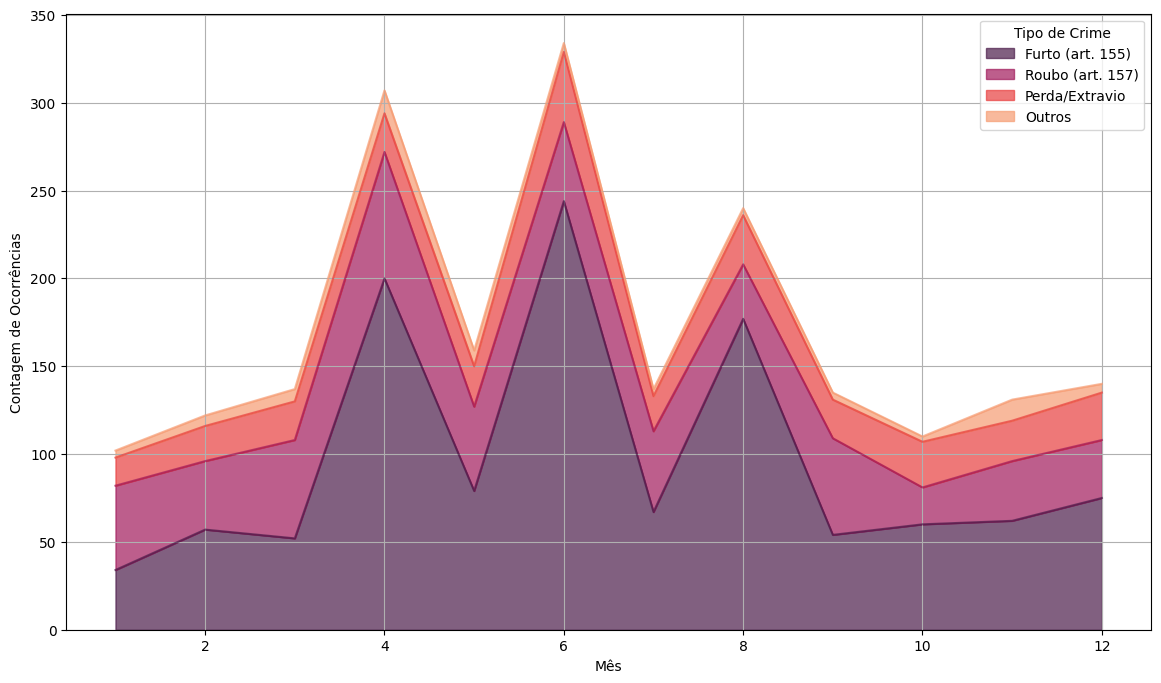

In [250]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que 'dados23' seja o DataFrame original
# Criando uma cópia do DataFrame
dados_cp = dados23.copy()

# Definindo os tipos de rubricas para manter

# Agrupar rubricas não pertencentes a 'tipos_in' em 'Outros'
dados_cp.loc[~dados_cp['RUBRICA'].isin(tipos_in), 'RUBRICA'] = 'Outros'

# Converter a coluna 'DATA_OCORRENCIA_BO' para datetime
dados_cp['DATA_OCORRENCIA_BO'] = pd.to_datetime(dados_cp['DATA_OCORRENCIA_BO'])

# Criar a coluna 'mes_ocorrencia'
dados_cp['mes_ocorrencia'] = dados_cp['DATA_OCORRENCIA_BO'].dt.month

# Agrupar dados_cp por mês e rubrica e contar ocorrências
area_data = dados_cp.groupby(['mes_ocorrencia', 'RUBRICA']).size().unstack(fill_value=0)

# Ordenar as colunas pelo total de ocorrências em ordem decrescente
column_totals = area_data.sum(axis=0)
area_data = area_data[column_totals.sort_values(ascending=False).index]

# Obter a paleta de cores "rocket" do Seaborn
palette = sns.color_palette("rocket", len(area_data.columns))

# Plotar o gráfico de área
area_data.plot(kind='area', stacked=True, figsize=(14, 8), color=palette, alpha=0.7)
plt.xlabel('Mês')
plt.ylabel('Contagem de Ocorrências')
plt.legend(title='Tipo de Crime')
plt.grid(True)
plt.show()


In [308]:

# Obter a paleta de cores "rocket" do Seaborn
palette = [f'rgb({int(c[0]*255)},{int(c[1]*255)},{int(c[2]*255)})' for c in sns.color_palette("rocket", len(area_data.columns))]

# Criar o gráfico de área usando Plotly
fig = go.Figure()

for idx, rubrica in enumerate(area_data.columns):
    fig.add_trace(go.Scatter(
        x=area_data.index,
        y=area_data[rubrica],
        mode='lines',
        line=dict(width=0.5, color=palette[idx]),
        stackgroup='one',
        name=rubrica,
        fill='tonexty'
    ))

# Configurações de layout para dark mode
fig.update_layout(
    # title='Tendência Acumulada de Ocorrências por Tipo de Crime e Mês',
    title_font=dict(size=24, color='white'),
    xaxis_title='Mês',
    yaxis_title='Contagem de Ocorrências',
    font=dict(color='white'),
    paper_bgcolor='#0E1117',
    plot_bgcolor='#0E1117',
    legend_title=dict(font=dict(color='white')),
    xaxis=dict(showgrid=True, gridcolor='gray', tickmode='linear', dtick=1),
    yaxis=dict(showgrid=True, gridcolor='gray'),
    width=800,
    height=600
)

# Save plot to HTML
fig.write_html("../results/plot_trends.html")


### Verificar periodo do dia com mais crimes / horario do dia 

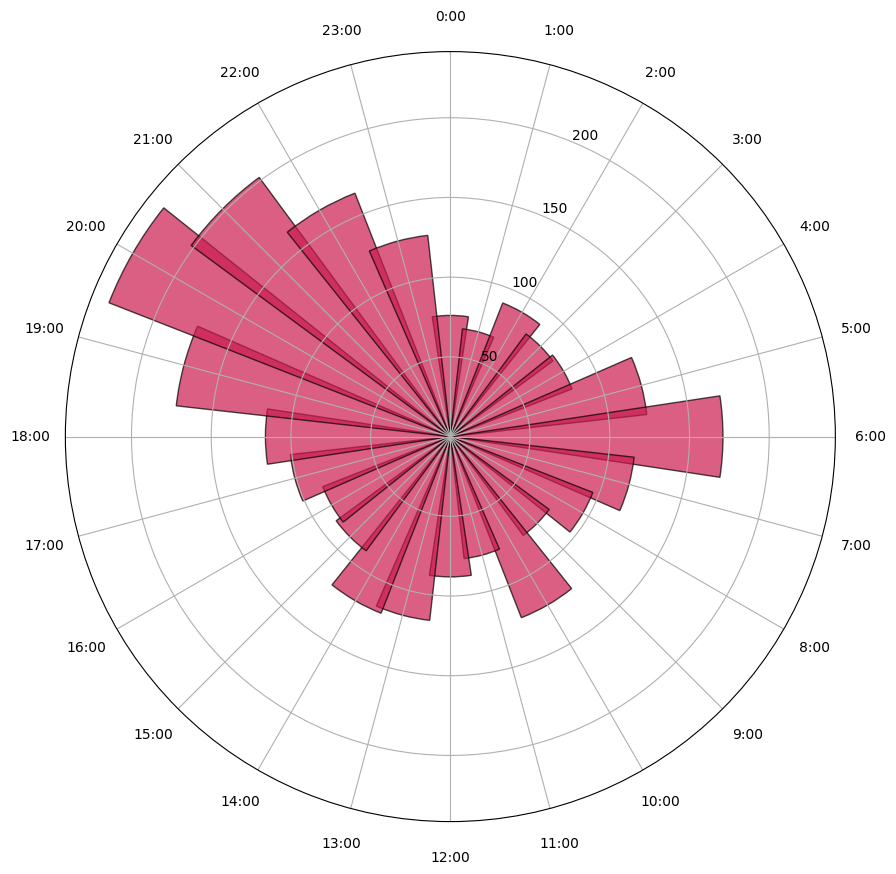

In [77]:
dados_hora = dados.dropna(subset=['HORA_OCORRENCIA'])

# Converter a coluna 'HORA_OCORRENCIA_BO' para o formato de hora
dados_hora['HORA_OCORRENCIA'] = pd.to_datetime(dados_hora['HORA_OCORRENCIA'], format='%H:%M:%S').dt.hour

# Agrupar os dados por hora e contar o número de ocorrências
hour_counts = dados_hora['HORA_OCORRENCIA'].value_counts().sort_index()

# Preparar os dados para o gráfico de barras polar
labels = hour_counts.index
values = hour_counts.values

# Criação do gráfico de barras polar
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Criação do ângulo para cada barra no sentido horário
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

# Adicionar valores iniciais ao final para fechamento do gráfico
values = np.concatenate((values, [values[0]]))
angles += angles[:1]

palette = sns.color_palette("rocket", 1)
# Plot das barras
bars = ax.bar(angles[:-1], values[:-1], width=0.3, color=palette, edgecolor='black', alpha=0.7)

# Ajuste dos rótulos para seguir a ordem do relógio
ax.set_xticks(angles[:-1])
ax.set_xticklabels([f'{int(label)}:00' for label in labels])

# Rotacionar os labels para ficarem mais legíveis
ax.tick_params(axis='x', which='major', pad=15)

# Ajustar a posição do zero para o topo do gráfico e rotação para sentido horário
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# Adicionar título
# plt.title('Distribuição de Crimes por Hora do Dia (Polar Bar Chart)', fontsize=14)

# Mostrar o gráfico
plt.show()


In [96]:

# Prepare data for polar bar chart
labels = hour_counts.index
values = hour_counts.values

# Streamlit background color
streamlit_bg_color = '#0E1117'

# Create polar bar chart using Plotly
fig = go.Figure()

fig.add_trace(go.Barpolar(
    r=values,
    theta=labels * (360 / 24),  # Convert hour to degrees (0-360)
    width=[360 / 24] * len(labels),
    marker_color='rgb(106,81,163)',
    marker_line_color="white",
    marker_line_width=2,
    opacity=0.8
))

fig.update_layout(
    # title='Distribuição de Crimes por Hora do Dia (Polar Bar Chart)',
    title_font=dict(size=24, color='white'),
    font=dict(size=18, color='white'),
    polar=dict(
        bgcolor=streamlit_bg_color,
        radialaxis=dict(visible=True, range=[0, max(values) + 1], showticklabels=True, ticks='', gridcolor='white'),
        angularaxis=dict(
            tickvals=np.arange(0, 360, 360 / 24),
            ticktext=[f'{int(label)}:00' for label in range(24)],
            direction="clockwise",  # Ensure clockwise direction
            rotation=90,  # Ensure 0 is at the top
            showticklabels=True,
            ticks='',
            gridcolor='white'
        )
    ),
    paper_bgcolor=streamlit_bg_color,
    plot_bgcolor=streamlit_bg_color,
    width=600,
    height=600,
    showlegend=False
)

# Save plot to HTML
fig.write_html("../results/polar_bar.html")


### Analise de correlação

In [27]:
dados.columns

Index(['ID_DELEGACIA', 'NOME_DEPARTAMENTO', 'NOME_SECCIONAL', 'NOME_DELEGACIA',
       'NOME_MUNICIPIO', 'ANO_BO', 'NUM_BO', 'VERSAO',
       'NOME_DEPARTAMENTO_CIRC', 'NOME_SECCIONAL_CIRC', 'NOME_DELEGACIA_CIRC',
       'NOME_MUNICIPIO_CIRC', 'DATA_OCORRENCIA_BO', 'HORA_OCORRENCIA',
       'DESCRICAO_APRESENTACAO', 'DATAHORA_REGISTRO_BO', 'DATA_COMUNICACAO_BO',
       'DATAHORA_IMPRESSAO_BO', 'DESCR_PERIODO', 'AUTORIA_BO',
       'FLAG_INTOLERANCIA', 'TIPO_INTOLERANCIA', 'FLAG_FLAGRANTE',
       'FLAG_STATUS', 'DESC_LEI', 'FLAG_ATO_INFRACIONAL', 'RUBRICA',
       'DESCR_CONDUTA', 'DESDOBRAMENTO', 'CIRCUNSTANCIA', 'DESCR_TIPOLOCAL',
       'DESCR_SUBTIPOLOCAL', 'CIDADE', 'BAIRRO', 'CEP', 'LOGRADOURO_VERSAO',
       'LOGRADOURO', 'NUMERO_LOGRADOURO', 'LATITUDE', 'LONGITUDE',
       'CONT_OBJETO', 'DESCR_MODO_OBJETO', 'DESCR_TIPO_OBJETO',
       'DESCR_SUBTIPO_OBJETO', 'DESCR_UNIDADE', 'QUANTIDADE_OBJETO',
       'MARCA_OBJETO', 'FLAG_BLOQUEIO', 'FLAG_DESBLOQUEIO', 'MES', 'ANO',
       '

In [47]:
# Converter colunas de data para datetime
dados['DATA_COMUNICACAO_BO'] = pd.to_datetime(dados['DATA_COMUNICACAO_BO'])
dados['DATA_OCORRENCIA_BO'] = pd.to_datetime(dados['DATA_OCORRENCIA_BO'])

# Extrair partes da data para análise
dados['ANO_COMUNICACAO'] = dados['DATA_COMUNICACAO_BO'].dt.year
dados['MES_COMUNICACAO'] = dados['DATA_COMUNICACAO_BO'].dt.month
dados['DIA_COMUNICACAO'] = dados['DATA_COMUNICACAO_BO'].dt.day
dados['ANO_OCORRENCIA'] = dados['DATA_OCORRENCIA_BO'].dt.year
dados['MES_OCORRENCIA'] = dados['DATA_OCORRENCIA_BO'].dt.month
dados['DIA_OCORRENCIA'] = dados['DATA_OCORRENCIA_BO'].dt.day

# Selecionar as colunas relevantes para correlação
colunas_para_correlacao = [ 
                           'LATITUDE', 'LONGITUDE', 
                           'MES_COMUNICACAO', 'DIA_COMUNICACAO', 'MES_OCORRENCIA', 'DIA_OCORRENCIA']

dados_numericos = dados[colunas_para_correlacao]
dados_numericos
# Calcular a matriz de correlação entre variáveis numéricas
correlation_matrix = dados_numericos.corr().round(2)


import plotly.figure_factory as ff

fig = px.imshow(correlation_matrix,
                text_auto=True,
                aspect="auto",
                color_continuous_scale='Viridis',
                labels=dict(color='Correlação'),
                title='Matriz de Correlação')

# Ajustar a aparência para modo escuro
fig.update_layout(
    title_x=0.5,
    paper_bgcolor='rgb(14, 17, 23)',
    plot_bgcolor='rgb(14, 17, 23)',
    font=dict(color='white')
)

html_file_path = "../results/matriz_correlacao.html"
pio.write_html(fig, file=html_file_path, auto_open=False)

# # # Plotar o heatmap da matriz de correlação
# plt.figure(figsize=(10, 8))

# heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# # plt.title('Matriz de Correlação')
# import mpld3

# html_str = mpld3.fig_to_html(heatmap.get_figure())
# with open("../results/matriz_correlacao.html", "w") as f:
#     f.write(html_str)
# plt.show()


### Marcas

In [150]:
import plotly.graph_objects as go
import seaborn as sns

# Supondo que df_roubo_ribp seja seu DataFrame
counts = dados["MARCA_OBJETO"].value_counts()

# Definir a quantidade mínima para consideração
quantidade_minima = 10

# Filtrar counts para incluir apenas marcas com pelo menos quantidade_minima ocorrências
counts_filtrado = counts[counts >= quantidade_minima]

total = counts_filtrado.sum()

# Calcular as porcentagens
porcentagens = (counts_filtrado / total) * 100

# Obter a paleta de cores "rocket" do Seaborn
colors = sns.color_palette("rocket", len(porcentagens)).as_hex()

# Criar um gráfico de barras interativo com Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=porcentagens.index,
    y=porcentagens.values,
    hoverinfo='x+y',  # Informações que aparecerão ao passar o mouse
    marker=dict(color=colors)
))

fig.update_layout(
    title={'text':'Marca dos celulares com maior frequência de furto e roubos.','x':0.5},
    xaxis_title='Marca',
    yaxis_title='Porcentagem',
    xaxis_tickangle=-45  # Rotacionar rótulos do eixo x para melhor legibilidade
)

fig.show()


In [186]:
counts = dados["MARCA_OBJETO"].value_counts()
counts 


MARCA_OBJETO
Samsung       1106
Apple          625
Motorola       512
Xiaomi         221
Outros          88
LG              37
Asus            17
Multilaser       5
Nokia            4
Positivo         3
Alcatel          3
Huawei           2
Lenovo           1
Sony             1
Microsoft        1
Name: count, dtype: int64

In [190]:
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go

# Supondo que 'dados' seja o DataFrame original
# Contando a frequência das marcas de objetos
counts = dados["MARCA_OBJETO"].value_counts()

top_4 = counts_filtrado.nlargest(4)
outros = counts_filtrado[counts_filtrado < counts_filtrado.nlargest(4).min()].sum()
top_5 = pd.concat([top_4, pd.Series(outros, index=['Outros'])])

# Calcular o total para obter as porcentagens
total = top_5.sum()

# Calcular as porcentagens
porcentagens = (top_5 / total) * 100

# Obter a paleta de cores "rocket" do Seaborn
colors = sns.color_palette("rocket", len(porcentagens)).as_hex()

# Criar um gráfico de barras interativo com Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=porcentagens.index,
    y=porcentagens.values,
    hoverinfo='x+y',  # Informações que aparecerão ao passar o mouse
    marker=dict(color=colors)
))

fig.update_layout(
    title={'text':'Marca dos celulares com maior frequência de furto e roubos','x':0.5},
    xaxis_title='Marca',
    yaxis_title='Porcentagem',
    xaxis_tickangle=-45  # Rotacionar rótulos do eixo x para melhor legibilidade
)

fig.show()


In [193]:
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio

# Supondo que 'dados' seja o DataFrame original
# Contando a frequência das marcas de objetos
counts = dados["MARCA_OBJETO"].value_counts()

# Manter as top 4 marcas e agrupar o restante em "Outros"
top_4 = counts.nlargest(4)
outros = counts[counts < counts.nlargest(4).min()].sum()
top_5 = pd.concat([top_4, pd.Series(outros, index=['Outros'])])

# Calcular o total para obter as porcentagens
total = top_5.sum()

# Calcular as porcentagens
porcentagens = (top_5 / total) * 100


# Obter a paleta de cores "rocket" do Seaborn
colors = [f'rgb({int(c[0]*255)},{int(c[1]*255)},{int(c[2]*255)})' for c in sns.color_palette("rocket", len(porcentagens))]

# Criar um gráfico de barras interativo com Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=porcentagens.index,
    y=porcentagens.values,
    hoverinfo='x+y',  # Informações que aparecerão ao passar o mouse
    marker=dict(color=colors)
))

fig.update_layout(
    # title={'text':'Marca dos celulares com maior frequência de furto e roubos','x':0.5},
    xaxis_title='Marca',
    yaxis_title='Porcentagem',
    xaxis_tickangle=-45,  # Rotacionar rótulos do eixo x para melhor legibilidade
    font=dict(color='white'),
    paper_bgcolor='#0E1117',
    plot_bgcolor='#0E1117'
)
# Salvar o gráfico como um arquivo HTML
fig.write_html("../results/marca.html")

### Bairro vs Periodo

In [166]:
dados['BAIRRO'].value_counts().nlargest(4)

BAIRRO
CENTRO             607
CAMPOS ELISEOS     478
JD JOQUEI CLUBE    450
RIBEIRANIA         154
Name: count, dtype: int64

In [175]:
sum(dados['PERIODO_DO_DIA'].isna())

1519

Index(['CENTRO', 'CAMPOS ELISEOS', 'JD JOQUEI CLUBE', 'RIBEIRANIA'], dtype='object', name='BAIRRO')
Contagem total por bairro:
 BAIRRO
CENTRO             607
CAMPOS ELISEOS     478
JD JOQUEI CLUBE    450
RIBEIRANIA         154
Name: count, dtype: int64
Contagem por bairro e período do dia:
 PERIODO_DO_DIA   Madrugada  Manhã  Noite  Tarde
BAIRRO                                         
CAMPOS ELISEOS          46     47     90     74
CENTRO                  38     55     91     90
JD JOQUEI CLUBE         37     10     12      1
RIBEIRANIA               6      6     25     12

Soma das ocorrências por bairro:
 BAIRRO
CAMPOS ELISEOS     257
CENTRO             274
JD JOQUEI CLUBE     60
RIBEIRANIA          49
dtype: int64


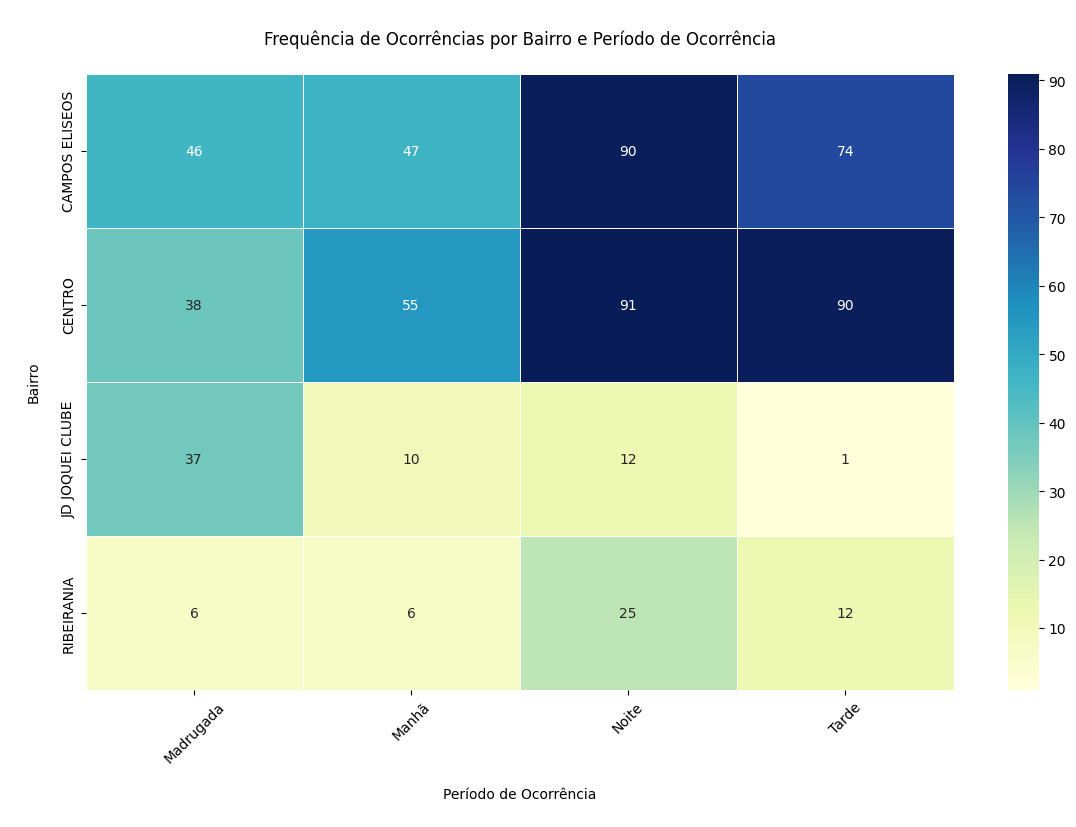

In [178]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrando os 4 bairros com mais casos no dataset
top_bairros = dados['BAIRRO'].value_counts().nlargest(4).index
print(top_bairros)
# Filtrando o DataFrame apenas com os bairros selecionados
dados_filtrados = dados[dados['BAIRRO'].isin(top_bairros)]

bairro_total_counts = dados_filtrados['BAIRRO'].value_counts()
print("Contagem total por bairro:\n", bairro_total_counts)

bairro_periodo_counts = dados_filtrados.groupby(['BAIRRO', 'PERIODO_DO_DIA']).size().unstack(fill_value=0)
print("Contagem por bairro e período do dia:\n", bairro_periodo_counts)
dados_filtrados.groupby(['BAIRRO', 'PERIODO_DO_DIA']).size()
bairro_periodo_sums = bairro_periodo_counts.sum(axis=1)
print("\nSoma das ocorrências por bairro:\n", bairro_periodo_sums)
# # Plotando um heatmap das frequências de ocorrências por bairro e período de ocorrência
plt.figure(figsize=(14, 8))
sns.heatmap(bairro_periodo_counts, annot=True, cmap=sns.color_palette("YlGnBu", as_cmap=True), fmt="d", linewidths=0.5)
plt.title('\nFrequência de Ocorrências por Bairro e Período de Ocorrência\n')
plt.xlabel('\nPeríodo de Ocorrência\n')
plt.ylabel('\nBairro\n')
plt.xticks(rotation=45)
plt.show()


In [182]:

# Filtrando os 4 bairros com mais casos no dataset
top_bairros = dados['BAIRRO'].value_counts().nlargest(4).index

# Filtrando o DataFrame apenas com os bairros selecionados
dados_filtrados = dados[dados['BAIRRO'].isin(top_bairros)]

# Calculando a frequência de ocorrências para cada combinação de BAIRRO e PERIODO_DO_DIA
bairro_periodo_counts = dados_filtrados.groupby(['BAIRRO', 'PERIODO_DO_DIA']).size().unstack(fill_value=0)

# Converter o DataFrame para o formato adequado para Plotly
bairro_periodo_counts = bairro_periodo_counts.reset_index().melt(id_vars='BAIRRO')

# Criar o heatmap usando Plotly
rocket_palette = [f'rgb({int(c[0]*255)},{int(c[1]*255)},{int(c[2]*255)})' for c in sns.color_palette("rocket", as_cmap=False)]

fig = px.density_heatmap(bairro_periodo_counts, x='PERIODO_DO_DIA', y='BAIRRO', z='value', color_continuous_scale=rocket_palette)

# Adicionar números dentro dos quadrados
fig.update_traces(
    texttemplate='%{z}',
    textfont=dict(color='white'),
    hovertemplate='Bairro: %{y}<br>Período: %{x}<br>Ocorrências: %{z}<extra></extra>'
)

# Configurações de layout para dark mode
fig.update_layout(
    # title='Frequência de Ocorrências por Bairro e Período de Ocorrência',
    title_font=dict(size=24, color='white'),
    xaxis_title='Período de Ocorrência',
    yaxis_title='Bairro',
    font=dict(color='white'),
    paper_bgcolor='#0E1117',
    plot_bgcolor='#0E1117',
    xaxis=dict(showgrid=False, title_standoff=10),
    yaxis=dict(showgrid=False, title_standoff=10)
)


# Save plot to HTML
fig.write_html("../results/bairro_periodo.html")

### TreeMap

In [279]:
dados23['BAIRRO'].value_counts()

BAIRRO
JD JOQUEI CLUBE                  522
CENTRO                           446
CAMPOS ELISEOS                   341
RIBEIRANIA                       124
PQ RIBEIRAO PRETO                115
                                ... 
CONDOMINIO VILLA BUENOS AIRES      1
REPUBLICA                          1
JARDIM PATRIARCA                   1
JARDIM JAMIL SEME CURY             1
RES E COM PALMARES                 1
Name: count, Length: 262, dtype: int64

In [280]:
# Contar a quantidade de ocorrências por bairro
bairro_counts = dados23['BAIRRO'].value_counts().reset_index()
bairro_counts.columns = ['BAIRRO', 'counts']

# Remover valores ausentes, se houver
bairro_counts.dropna(subset=['counts'], inplace=True)

# Converter a coluna "counts" para tipo numérico, se possível
bairro_counts['counts'] = pd.to_numeric(bairro_counts['counts'], errors='coerce')

# Remover linhas com valores não numéricos
bairro_counts.dropna(subset=['counts'], inplace=True)

bairro_counts = bairro_counts[bairro_counts['counts']>20] # Maior que a media ou quartil...

# Criar o objeto Treemap
fig = go.Figure(go.Treemap(
    labels=bairro_counts['BAIRRO'],
    parents=[""] * len(bairro_counts),  # Todos os bairros são raízes
    values=bairro_counts['counts']
))

# Atualizar layout
fig.update_layout(
    # title='Ocorrências por Bairro',
    colorway=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'],
)

# Exibir o gráfico
fig.show()


In [287]:
# colors = [f'rgb({int(c[0]*255)},{int(c[1]*255)},{int(c[2]*255)})' for c in sns.color_palette("rocket", len(bairro_counts))]
colors = [f'rgb({int(c[0]*255)},{int(c[1]*255)},{int(c[2]*255)})' for c in sns.color_palette("plasma", len(bairro_counts))]

# Criar o objeto Treemap
fig = go.Figure(go.Treemap(
    labels=bairro_counts['BAIRRO'],
    parents=[""] * len(bairro_counts),  # Todos os bairros são raízes
    values=bairro_counts['counts'],
    textinfo="label+value+percent entry",
    marker=dict(colors=colors)
))

# Atualizar layout para corresponder ao fundo do Streamlit
fig.update_layout(
    # title='Ocorrências por Bairro',
    title_font=dict(size=24, color='white'),
    font=dict(color='white'),
    paper_bgcolor='#0E1117',  # Cor do fundo da página
    plot_bgcolor='#0E1117',    # Cor do fundo do gráfico
    # width=800,
    # height=400,
)


# Salvar gráfico como HTML
fig.write_html("../results/treemap.html")


### Analise tempo ate o BO

Outra questão interessante é quanto tempo as pessoas esperam antes de denunciar o crime. Ao subtrair a data em que o crime ocorreu e foi denunciado, obtenho informações sobre o tempo de “atraso” e estratifico-os por crimes.

In [6]:
dados_cp=dados.copy()

# dados_cp.loc[~dados_cp['RUBRICA'].isin(tipos_in), 'RUBRICA'] = 'Outros'

dados_cp['RUBRICA'].value_counts()

RUBRICA
Furto (art. 155)                                                                    2036
Roubo (art. 157)                                                                    1558
Perda/Extravio                                                                       775
Localização/Apreensão e Entrega de veículo                                            77
Outros não criminal                                                                   71
Estelionato (art. 171)                                                                19
Ameaça (art. 147)                                                                     18
Localização/Apreensão e Entrega de objeto                                             13
Lesão corporal (art. 129)                                                             13
Localização/Apreensão de veículo                                                      10
Localização/Apreensão de objeto                                                        8
Descumpriment

In [7]:
dados['DATA_COMUNICACAO_BO'] = pd.to_datetime(dados['DATA_COMUNICACAO_BO'])
dados['DATA_OCORRENCIA_BO'] = pd.to_datetime(dados['DATA_OCORRENCIA_BO'])

# Calcular o tempo de atraso em dias
dados['TEMPO_ATRASO'] = (dados['DATA_COMUNICACAO_BO'] - dados['DATA_OCORRENCIA_BO']).dt.days

dados = dados[dados['TEMPO_ATRASO'] >= 0]

# Filtrar crimes que aparecem pelo menos 10 vezes
crime_counts = dados['RUBRICA'].value_counts()
crimes_filtrados = crime_counts[crime_counts >= 10].index
dados_filtrados = dados[dados['RUBRICA'].isin(crimes_filtrados)]

# Exibir os primeiros registros para verificar
print(len(dados_filtrados))
print(dados_filtrados[['DATA_OCORRENCIA_BO', 'DATA_COMUNICACAO_BO', 'TEMPO_ATRASO']].head())


4590
      DATA_OCORRENCIA_BO DATA_COMUNICACAO_BO  TEMPO_ATRASO
23380         2023-01-07          2023-01-09             2
23381         2023-01-11          2023-01-11             0
23382         2023-01-11          2023-01-11             0
23383         2023-01-10          2023-01-11             1
23384         2023-01-10          2023-01-11             1


In [8]:

atraso_por_crime = dados_filtrados.groupby('RUBRICA')['TEMPO_ATRASO'].describe()

print(len(atraso_por_crime))
# Exibir as estatísticas descritivas
print(atraso_por_crime.head(5))


10
                                   count       mean         std  min  25%  \
RUBRICA                                                                     
Ameaça (art. 147)                   18.0   3.444444    3.899053  0.0  1.0   
Estelionato (art. 171)              19.0   1.052632    0.911268  0.0  0.5   
Furto (art. 155)                  2036.0   7.834971  116.653380  0.0  0.0   
Lesão corporal (art. 129)           13.0  28.461538  101.119249  0.0  0.0   
Localização/Apreensão de veículo    10.0   0.200000    0.421637  0.0  0.0   

                                  50%  75%     max  
RUBRICA                                             
Ameaça (art. 147)                 3.0  3.0    16.0  
Estelionato (art. 171)            1.0  1.0     3.0  
Furto (art. 155)                  1.0  2.0  3652.0  
Lesão corporal (art. 129)         0.0  1.0   365.0  
Localização/Apreensão de veículo  0.0  0.0     1.0  


In [9]:
atraso_por_crime

crime_counts = dados['RUBRICA'].value_counts()
crimes_filtrados = crime_counts[crime_counts >= 10].index
dados_filtrados = dados[dados['RUBRICA'].isin(crimes_filtrados)]

# Criar os intervalos de tempo
intervalos = [-1, 0, 1, 2, 7, 30, 365, float('inf')]
labels = ['No mesmo dia', '1 dia de atraso', '2 dias', '3 a 7 dias', '8 a 30 dias', '30 dias a 1 ano', 'Mais de 1 ano']

# Adicionar uma nova coluna com a categoria de tempo de atraso
dados_filtrados['TEMPO_CATEGORIA'] = pd.cut(dados_filtrados['TEMPO_ATRASO'], bins=intervalos, labels=labels)

# Agrupar por crime e categoria de tempo de atraso
atraso_por_crime = dados_filtrados.groupby(['RUBRICA', 'TEMPO_CATEGORIA']).size().unstack(fill_value=0)

atraso_por_crime

/tmp/ipykernel_31540/1874908866.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_filtrados['TEMPO_CATEGORIA'] = pd.cut(dados_filtrados['TEMPO_ATRASO'], bins=intervalos, labels=labels)
/tmp/ipykernel_31540/1874908866.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  atraso_por_crime = dados_filtrados.groupby(['RUBRICA', 'TEMPO_CATEGORIA']).size().unstack(fill_value=0)


TEMPO_CATEGORIA,No mesmo dia,1 dia de atraso,2 dias,3 a 7 dias,8 a 30 dias,30 dias a 1 ano,Mais de 1 ano
RUBRICA,,,,,,,
Ameaça (art. 147),3,3,1,9,2,0,0
Estelionato (art. 171),5,10,2,2,0,0,0
Furto (art. 155),756,639,232,260,100,42,7
Lesão corporal (art. 129),8,3,1,0,0,1,0
Localização/Apreensão de veículo,8,2,0,0,0,0,0
Localização/Apreensão e Entrega de objeto,8,3,2,0,0,0,0
Localização/Apreensão e Entrega de veículo,48,25,1,2,1,0,0
Outros não criminal,26,16,4,17,3,5,0
Perda/Extravio,294,210,81,120,54,14,2


Index(['Ameaça (art. 147)', 'Estelionato (art. 171)', 'Furto (art. 155)',
       'Lesão corporal (art. 129)', 'Localização/Apreensão de veículo',
       'Localização/Apreensão e Entrega de objeto',
       'Localização/Apreensão e Entrega de veículo', 'Outros não criminal',
       'Perda/Extravio', 'Roubo (art. 157)'],
      dtype='object', name='RUBRICA')
Index(['Ameaça (art. 147)', 'Estelionato (art. 171)', 'Furto (art. 155)',
       'Lesão corporal (art. 129)', 'Localização/Apreensão de veículo',
       'Localização/Apreensão e Entrega de objeto',
       'Localização/Apreensão e Entrega de veículo', 'Outros não criminal',
       'Perda/Extravio', 'Roubo (art. 157)'],
      dtype='object', name='RUBRICA')
Index(['Ameaça (art. 147)', 'Estelionato (art. 171)', 'Furto (art. 155)',
       'Lesão corporal (art. 129)', 'Localização/Apreensão de veículo',
       'Localização/Apreensão e Entrega de objeto',
       'Localização/Apreensão e Entrega de veículo', 'Outros não criminal',
       'Pe

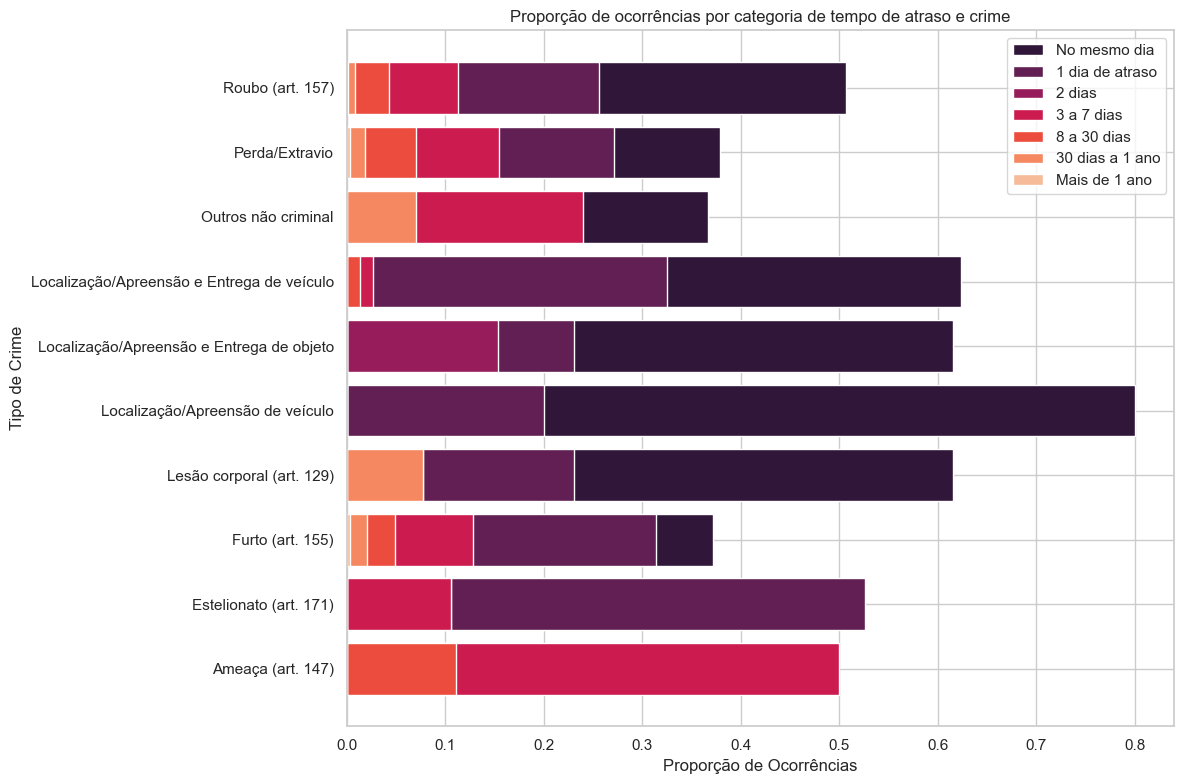

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponha que você já tenha os dados e tenha feito as operações necessárias para criar o dataframe 'atraso_por_crime'

# Configurar o estilo e tamanho do gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Calcular o total de ocorrências para cada tipo de crime
atraso_por_crime['Total'] = atraso_por_crime[labels].sum(axis=1)

# Calcular a proporção em relação ao total para cada categoria de tempo de atraso
for categoria in labels:
    atraso_por_crime[categoria] = atraso_por_crime[categoria] / atraso_por_crime['Total']

# Definir uma paleta de cores diferente
cores = sns.color_palette("rocket", len(labels))

# Plotar o histograma empilhado
for i, categoria in enumerate(labels):
    print(atraso_por_crime.index)
    plt.barh(atraso_por_crime.index, atraso_por_crime[categoria], label=categoria, color=cores[i])

# Adicionar legenda
plt.legend()

# Adicionar título e rótulos nos eixos
plt.title('Proporção de ocorrências por categoria de tempo de atraso e crime')
plt.xlabel('Proporção de Ocorrências')
plt.ylabel('Tipo de Crime')

# Mostrar o gráfico
plt.tight_layout()
plt.show()
